In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0-alpha0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.2
pandas 0.24.2
sklearn 0.20.3
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
# learning_rate: [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
# W = W + grad * learning_rate

learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu',
                           input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(
        patience=5, min_delta=1e-2)]
    history = model.fit(x_train_scaled, y_train,
                        validation_data = (x_valid_scaled, y_valid),
                        epochs = 100,
                        callbacks = callbacks)
    histories.append(history)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 99us/sample - loss: 6.4126 - val_loss: 5.3006
Epoch 2/100
11610/11610 [==============================] - 1s 62us/sample - loss: 4.0658 - val_loss: 3.4573
Epoch 3/100
11610/11610 [==============================] - 1s 64us/sample - loss: 2.7526 - val_loss: 2.4050
Epoch 4/100
11610/11610 [==============================] - 1s 63us/sample - loss: 1.9846 - val_loss: 1.7867
Epoch 5/100
11610/11610 [==============================] - 1s 63us/sample - loss: 1.5269 - val_loss: 1.4206
Epoch 6/100
11610/11610 [==============================] - 1s 64us/sample - loss: 1.2512 - val_loss: 1.2012
Epoch 7/100
11610/11610 [==============================] - 1s 62us/sample - loss: 1.0839 - val_loss: 1.0693
Epoch 8/100
11610/11610 [==============================] - 1s 63us/sample - loss: 0.9804 - val_loss: 0.9879
Epoch 9/100
11610/11610 [==============================] - 1s 66us/sample - loss: 0.914

11610/11610 [==============================] - 1s 59us/sample - loss: 2.0078 - val_loss: 1.7579
Epoch 3/100
11610/11610 [==============================] - 1s 57us/sample - loss: 1.3404 - val_loss: 1.3027
Epoch 4/100
11610/11610 [==============================] - 1s 92us/sample - loss: 1.0620 - val_loss: 1.0935
Epoch 5/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.9320 - val_loss: 0.9874
Epoch 6/100
11610/11610 [==============================] - 1s 62us/sample - loss: 0.8646 - val_loss: 0.9278
Epoch 7/100
11610/11610 [==============================] - 1s 61us/sample - loss: 0.8241 - val_loss: 0.8882
Epoch 8/100
11610/11610 [==============================] - 1s 64us/sample - loss: 0.7957 - val_loss: 0.8593
Epoch 9/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.7734 - val_loss: 0.8361
Epoch 10/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.7546 - val_loss: 0.8161
Epoch 11/100
11610/11610 [=============

11610/11610 [==============================] - 1s 57us/sample - loss: 0.4819 - val_loss: 0.5163
Epoch 17/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4769 - val_loss: 0.5103
Epoch 18/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4725 - val_loss: 0.5063
Epoch 19/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4683 - val_loss: 0.5013
Epoch 20/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4649 - val_loss: 0.4975
Epoch 21/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4614 - val_loss: 0.4955
Epoch 22/100
11610/11610 [==============================] - ETA: 0s - loss: 0.459 - 1s 57us/sample - loss: 0.4583 - val_loss: 0.4912
Epoch 23/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4554 - val_loss: 0.4875
Epoch 24/100
11610/11610 [==============================] - 1s 63us/sample - loss: 0.4527 - val_loss: 0.4840
Epoch 25

Learning rate:  0.0001


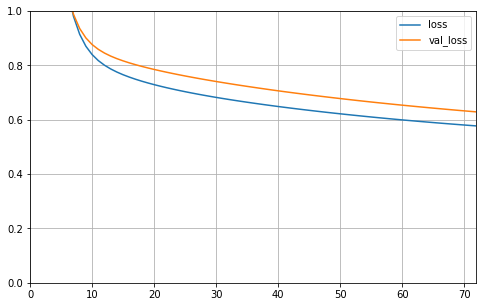

Learning rate:  0.0003


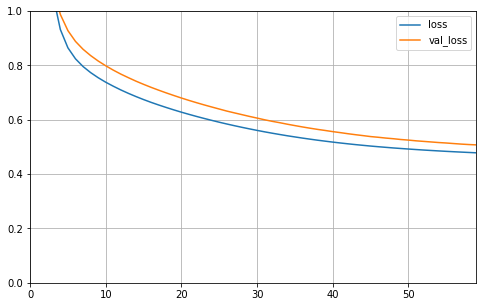

Learning rate:  0.001


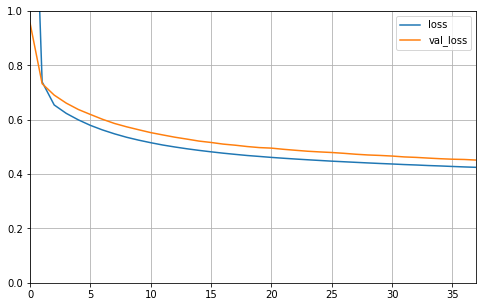

Learning rate:  0.003


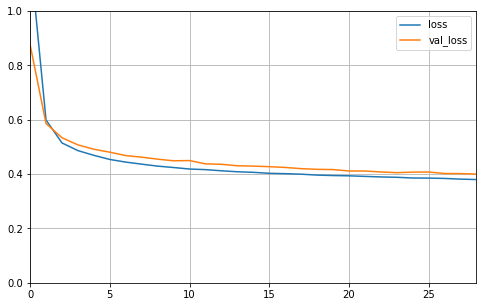

Learning rate:  0.01


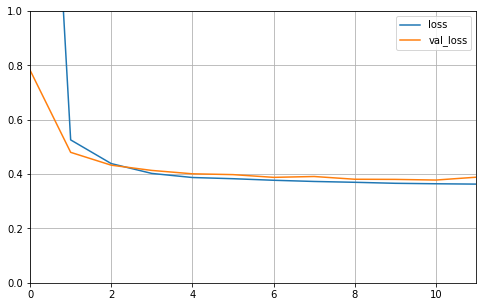

Learning rate:  0.03


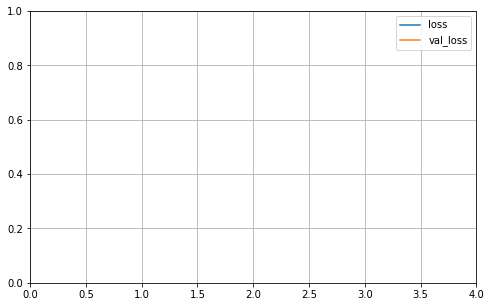

In [6]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
for lr, history in zip(learning_rates, histories):
    print("Learning rate: ", lr)
    plot_learning_curves(history)